<a href="https://colab.research.google.com/github/PaulaDiz/QUANTUM_COMPUTING/blob/main/UFVQC2025_02_SuperdenseCoding_Teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UFV QC 03 Lab - Superdense Coding & Teleportation

### Objective
Let's create our first quantum protocols.
In this lab we will get learn a bit more about programming with Qiskit, and see three protocols.

We will see the following:

1. Classical Conditionals
2. Custom Gates
3. Superdense Coding
4. Teleportation Protocol
5. Teleportation of Entanglement

# 1. Classical conditionals

Imagine we have a quantum circuit, where we want to apply a gate based on the state of a classical Bit.

In Qiskit, we solve this using the `c_if()` instruction.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━

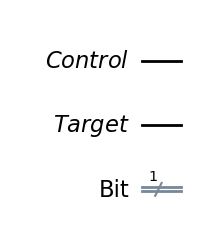

In [ ]:
## For google Collab users, remove if you are running on your local machine
!pip install qiskit qiskit-ibm-runtime qiskit[visualization]

import qiskit

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# Let's create a basic circuit
q_control = QuantumRegister(1, "Control")
q_target = QuantumRegister(1, "Target")
bit = ClassicalRegister(1, "Bit")

qc = QuantumCircuit(q_control, q_target, bit)

qc.draw('mpl')

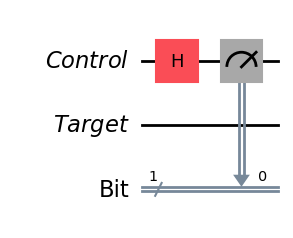

In [ ]:
# We can now apply gates over the control and measure it
qc.h(q_control)
qc.measure(q_control, bit)

qc.draw('mpl')

<ipython-input-4-9e476ee74407>:3: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(q_target).c_if(bit, 1)


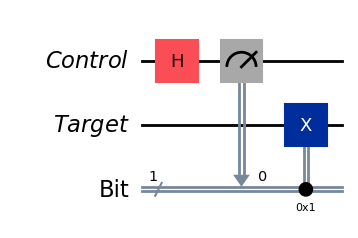

In [ ]:
# Let's now do a conditional not on the target qubit using the c_if instruction
# The c_if instruction applies the gate only if the given bit has the value we pass to it
qc.x(q_target).c_if(bit, 1)

qc.draw('mpl')

# 2. Composing circuits and Custom Gates

Now, imagine that we have two different circuits and we want to join them together.

For example one could be the part that initializes our qubits to a state, and the other the one that measures and applies gates.
We could create two different circuits, and later on compose them.

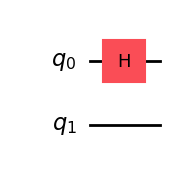

In [6]:
# Let's re-do the previous circuit, but separating the initialization and measurement parts

initialization_qc = QuantumCircuit(2)

initialization_qc.h(0)

initialization_qc.draw('mpl')

<ipython-input-7-79e2c3a59ecd>:4: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  measurement_qc.x(1).c_if(0, 1)


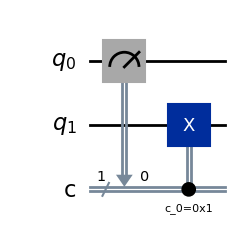

In [7]:
measurement_qc = QuantumCircuit(2,1)

measurement_qc.measure(0,0)
measurement_qc.x(1).c_if(0, 1)

measurement_qc.draw('mpl')

Lets now compose both parts into a single circuits.

We can do multiple things, we do that with the `compose` function

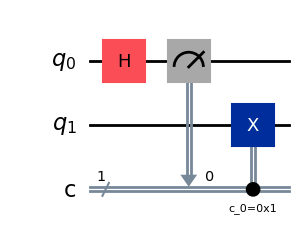

In [8]:
qc = initialization_qc.compose(measurement_qc, [0,1]) # The second argument, represents the mapping of qubits

qc.draw('mpl')

We could alternatively, create instructions from both parts, and apply them on a new quantum circuit

/usr/local/lib/python3.11/dist-packages/qiskit/circuit/quantumcircuit.py:3428: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


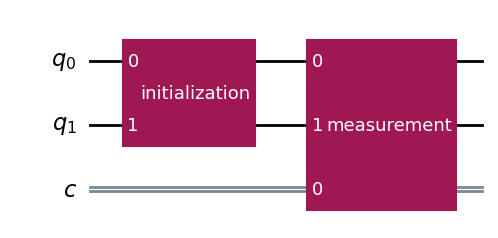

In [9]:
initialization_instruction = initialization_qc.to_instruction(label="initialization")
measurement_instruction = measurement_qc.to_instruction(label="measurement")

qc = QuantumCircuit(2, 1)

qc.append(initialization_instruction, [0,1])
qc.append(measurement_instruction, [0,1], [0]) # Again this requires the mapping, and we are adding the classical mapping in case it is needed

qc.draw('mpl')

# 3. Superdense Coding

If you remember the Superdense Coding protocol, it's composed of two qubits, and the following parts in the circuit:

1. Bell State initialization
2. Codification of the message
3. Bell State Analysis

Let's now create our own circuit to do this protocol

In [4]:
!pip install qiskit qiskit-ibm-runtime qiskit[visualization]

import qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━

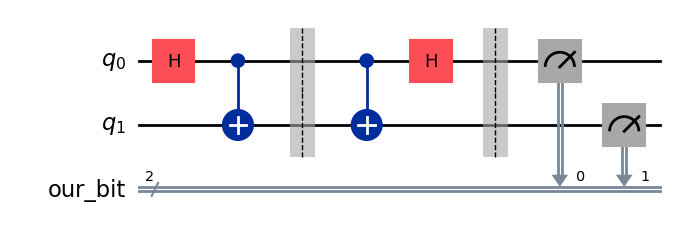

In [13]:
# Compose the Superdense coding circuit for the message [0,0]
#### YOUR CODE HERE
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister
#CREACIÓN DEL CIRCUITO

#Número de qubits
qubit = QuantumRegister(2, 'q') #qubits cuanticos

#Número de bits (Cada qubit lleva un bit asociado)
bit = ClassicalRegister(2, 'our_bit') #bits clasicos

#Creamos el circuito con nuestros qubits y bits
qc = QuantumCircuit(qubit, bit) # con (1,1) tambien funciona primero qubits segundo bits clasicos
#-------------------------------------------------------------------------------------------------

#1.APLICACIÓN DE PUERTAS PARA CREAR EL ESTADO DE BELL

qc.h(qubit[0]) #qubit[0]seria si tuvieramos dos y lo aplicariamos al segundo
qc.cx(0,1) # q0 es el cubit de control y q1 el que actua

#--------------------------------------------------------------------------------------------------

#2.CODIFICACIÓN DEL MENSAJE

#En este caso no aplicamos ninguna puerta

#--------------------------------------------------------------------------------------------------

#3.ANÁLISIS DEL ESTADO DE BELL (DECODIFICACIÓN)

qc.barrier()
qc.cx(0,1)
qc.h(qubit[0])
qc.barrier()
#--------------------------------------------------------------------------------------------------
#MEDICIONES
qc.measure(0,0)
qc.measure(1,1)
#tambien puede hacerse como -> qc.measure([0,0],[1,1]) el primer corchete son los cubits y el segundo
#los bits asociados a cada uno.

#----------------------------------------------------------------------------------------------------
#DIBUJUAMOS EL CIRCUITO
qc.draw(output='mpl')


####

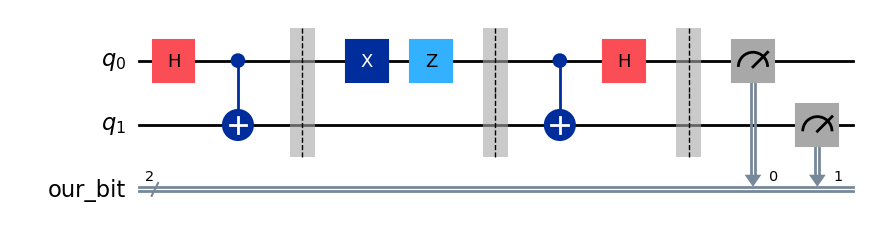

In [12]:
# Compose the Superdense coding circuit for the message [1,1]
#### YOUR CODE HERE
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister
#CREACIÓN DEL CIRCUITO

#Número de qubits
qubit = QuantumRegister(2, 'q') #qubits cuanticos

#Número de bits (Cada qubit lleva un bit asociado)
bit = ClassicalRegister(2, 'our_bit') #bits clasicos

#Creamos el circuito con nuestros qubits y bits
qc_2 = QuantumCircuit(qubit, bit) # con (1,1) tambien funciona primero qubits segundo bits clasicos
#-------------------------------------------------------------------------------------------------

#1.APLICACIÓN DE PUERTAS PARA CREAR EL ESTADO DE BELL

qc_2.h(0) #qubit[0]seria si tuvieramos dos y lo aplicariamos al segundo
qc_2.cx(0,1) # q0 es el cubit de control y q1 el que actua

#--------------------------------------------------------------------------------------------------

#2.CODIFICACIÓN DEL MENSAJE

qc_2.barrier()
qc_2.x(0)
qc_2.z(0)
qc_2.barrier()

#--------------------------------------------------------------------------------------------------

#3.ANÁLISIS DEL ESTADO DE BELL (DECODIFICACIÓN)

qc_2.cx(0,1)
qc_2.h(qubit[0])
qc_2.barrier()
#--------------------------------------------------------------------------------------------------
#4.MEDICIONES
qc_2.measure(0,0)
qc_2.measure(1,1)
#tambien puede hacerse como -> qc.measure([0,0],[1,1]) el primer corchete son los cubits y el segundo
#los bits asociados a cada uno.

#----------------------------------------------------------------------------------------------------
#DIBUJUAMOS EL CIRCUITO
qc_2.draw(output='mpl')


####

In [21]:
# Simulate your circuit to see if the circuit works
# Use the code from the previous lab

#### YOUR CODE TO LAUNCH THE CIRCUIT HERE
# The part we dont care about now
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2  #procesador cuantico
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

fake_manila = FakeManilaV2()
pm = generate_preset_pass_manager(backend=fake_manila, optimization_level=1)

#SIMULACIÓN PARA EL CIRCUITO QC

# The part we care about now
isa_qc = pm.run(qc)

sampler = Sampler(mode=fake_manila)

job = sampler.run([isa_qc], shots=100) #shots: cantidad de veces q lanzamos el circuito

job

# Lets see if the job has finished
job.status()

# Lets get the results
pub_result = job.result()[0]
print(pub_result)

pub_result.data.our_bit.get_counts() # el uno es que ha salido una vez

####

SamplerPubResult(data=DataBin(our_bit=BitArray(<shape=(), num_shots=100, num_bits=2>)), metadata={'shots': 100, 'circuit_metadata': {}})


/usr/local/lib/python3.11/dist-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


{'00': 100}

In [20]:
#SIMULACIÓN PARA EL CIRCUITO QC_2
# The part we care about now
isa_qc = pm.run(qc_2)

sampler = Sampler(mode=fake_manila)

job = sampler.run([isa_qc], shots=100) #shots: cantidad de veces q lanzamos el circuito

job

# Lets see if the job has finished
job.status()

# Lets get the results
pub_result = job.result()[0]
print(pub_result)

pub_result.data.our_bit.get_counts() # el uno es que ha salido una vez

SamplerPubResult(data=DataBin(our_bit=BitArray(<shape=(), num_shots=100, num_bits=2>)), metadata={'shots': 100, 'circuit_metadata': {}})


/usr/local/lib/python3.11/dist-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


{'11': 100}

# 4. Teleportation protocol

If you remember, all of the protocols in this class have the same components, and you just built them!

Given the components you created, let's create the Teleportation protocol.
The teleportation protocol involved needed 1 Transmitted Qubit a Bell Pair and 2 Bits, and had the following steps:
1. Create a Bell Pair
2. Use the Bell State analyzer with the Qubit to be transmitted and one of the Qubit of the Bell Pairs
3. Given the results of the analyzer, apply the corresponding X and Z gates.

In [ ]:
# Compose the Teleportation protocol circuit here:
#### YOUR CODE HERE


####

We can now test it, by initializing our qubit to be transmitted to any Quantum State

In [ ]:
# Initialize your qubit to be transmitted to a 25/75 probability amplitude of it being 0/1
#### YOUR CODE HERE


####

In [ ]:
# Launch your circuit on a simulator to see the distribution
#### YOUR CODE HERE


####